In [60]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
import requests
import time
import scipy.stats as st
from IPython.display import display

# Data files
most_sleep_metadata_path = "Resources/MostSleep.csv"
lif_quality_path = "Resources/life_quality_and_health_by_country.csv"

# Read the mouse data and the study results
most_sleep_metadata = pd.read_csv(most_sleep_metadata_path)
study_results = pd.read_csv(lif_quality_path)

# Combine the data into a single DataFrame with the Country column as the key
#sleep_study_data = pd.merge(most_sleep_metadata, study_results, how="left", on=["Country", "Country"])
sleep_study_data = pd.merge(most_sleep_metadata, study_results, on=["Country"])

#Rename the "total" column to "total quality of life" 
sleep_study_data = sleep_study_data.rename(columns={"Total":"Total Quality of Life"})

sleep_study_data

,Country,Sleep hours,Population,Stability,Rights,Health,Safety,Climate,Cost,Popularity,Total Quality of Life
0,Mexico,9.00,"130,262,216",53,33,45,42,82,30,59,47
1,South Africa,7.04,"60,604,000",43,54,26,40,95,49,38,51
2,Finland,7.36,"5,548,360",85,100,87,96,17,46,51,69
3,Netherlands,7.36,"17,173,099",81,99,83,95,21,40,59,68
4,New Zealand,7.30,"4,860,643",90,100,81,97,36,29,54,69
5,Estonia,7.25,"1,325,185",72,90,78,90,17,40,35,61
6,Iceland,7.25,"343,353",84,94,87,100,7,37,51,65
7,Hungary,7.21,"9,634,164",68,56,79,97,43,58,47,63
8,Croatia,7.20,"4,081,651",66,59,78,96,50,68,39,66
9,Belgium,7.18,"11,632,326",72,88,90,94,20,32,56,63


In [92]:
def linear_regression_analysis_plot(data, x_column, y_column, x_label, y_label, title, file_name=None):
    # Extract the data from the specified columns
    x_data = data[x_column]
    y_data = data[y_column]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x_data, y_data)

    # Calculate regression line
    regress_values = x_data * slope + intercept

    # Create scatter plot
    plt.figure(figsize=(9, 8))
    plt.scatter(x_data, y_data, c='#4B9DDB', edgecolors="#4B9DDB")

    # Plot regression line
    plt.plot(x_data, regress_values, "r-", label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}')

    # Annotate the equation of the line on the plot in the middle
    x_range = max(x_data) - min(x_data)
    y_range = max(y_data) - min(y_data)
    x_text = min(x_data) + x_range * 0.4
    y_text = min(y_data) + y_range * 0.1
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_text, y_text), fontsize=12, color="red", ha='right', va='bottom')

    # Add labels and title to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print the correlation coefficient (r-value)
    r_text = f"r = {r_value:.2f}"
    print("Regression Results:")
    print(f"Slope: {slope:.2f}")
    print(f"Intercept: {intercept:.2f}")
    print(f"P-value: {p_value:.2f}")
    print(f"Correlation coefficient (r-value): {r_value:.2f}")

    # Save the figure if file_name is provided
    if file_name:
        plt.savefig(file_name)

    # Display the plot in the notebook
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Regression Results:
Slope: 0.23
Intercept: 61.19
P-value: 0.91
Correlation coefficient (r-value): 0.02


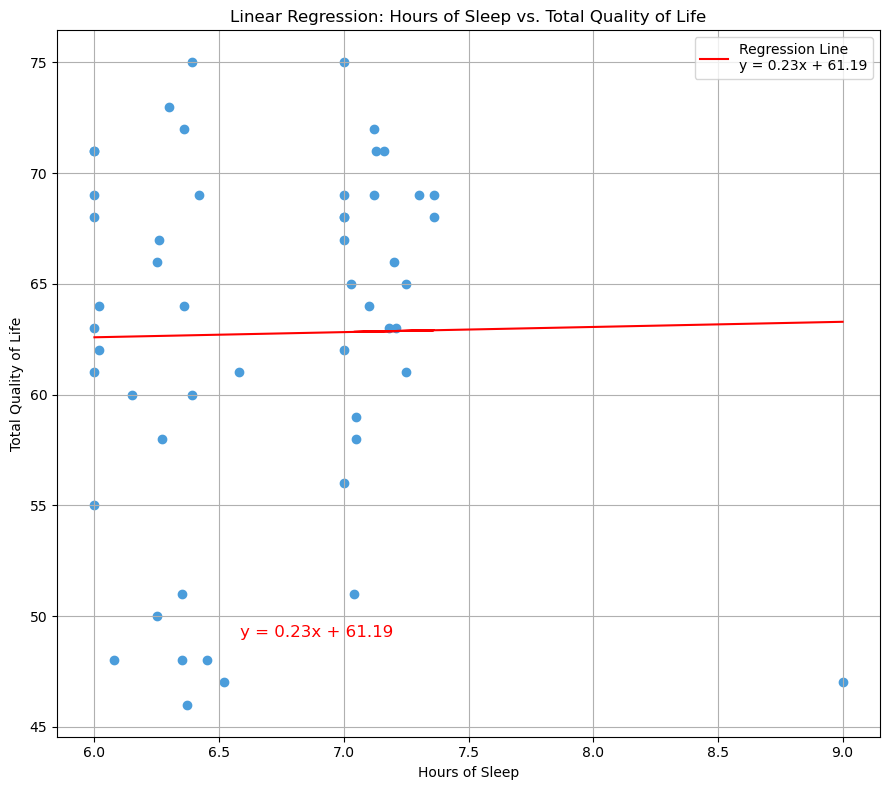

In [93]:
# Assuming your DataFrame is named 'df'

# Example 1: Linear regression between "Sleep hours" and "Total Quality of Life"
linear_regression_analysis_plot(sleep_study_data, x_column='Sleep hours', y_column='Total Quality of Life',
                                x_label='Hours of Sleep', y_label='Total Quality of Life',
                                title='Linear Regression: Hours of Sleep vs. Total Quality of Life',
                                file_name='Resources/sleep_vs_quality.png')
